# Spectral Partitioning of Bipartite Graphs

---

Typical example of bipartite graph is a graph obtained from a collection of documents presented as a _term $\times$ document_  matrix.

## Prerequisites

The reader should be familiar with k-means algorithm and spectral graph partitioning theory and algorithms.
 
## Competences 

The reader should be able to apply spectral partitioning of bipartite graphs to data clustering problems.

__Credits__: The notebook is based on [I. Mirošević, Spectral Graph Partitioning and Application to Knowledge Extraction][Mir05].

[Mir05]: #1 "I. Mirošević, 'Spectral Graph Partitioning and Application to Knowledge Extraction', M.Sc. Thesis, Iniversity of Zagreb, 2005 (in Croatian)." 

---

## Definitions

__Undirected bipartite graph__ $G$ is a triplet 
$G=(T,D,E)$, where $T=\{t_{1},\cdots ,t_{m}\}$ and 
$D=\{d_{1},...,d_{n}\}$ are two sets of vertices and
$E=\{(t_{i},d_{j}):t_{i}\in R,d_{j}\in D\}$, 
is a set of edges.

$G$ is __weighted__ if there is weight $\omega(e)$ associated with each edge $e\in E$.

For example, $D$ is a set of documents, 
$T$ is a set of terms (words) and  edge $e=(t_{i},d_{j})$ exists if
document $d_{j}$ contains term $t_{i}$. Weight $\omega(e)$ can be number of appearances 
of the term $t_i$ in the document $d_j$.

A __term-by-document-matrix__ is a matrix $A\in\mathbb{R}^{m\times n}$ with 
$A_{ij}=\omega((t_i,d_j))$.

## Facts

1. The weight matrix of $G$ is $W=\begin{bmatrix}0 & A \\ A^{T} & 0 \end{bmatrix}$.

2. The Laplacian matrix of $G$ is 
$L=\begin{bmatrix} \Delta_{1} & -A \\ -A^{T} & \Delta_{2}\end{bmatrix}$,
where $\Delta_1$ and $\Delta_2$ are diagonal matrices with elements 
$\Delta_{1,ii}=\sum\limits_{j=1}^n A_{ij}$ for $i=1,\ldots,m$, and 
$\Delta_{1,jj}=\sum\limits_{i=1}^m A_{ij}$ for $j=1,\ldots,n$.

3. The normalized Laplacian matrix of $G$ is 
$L_n=\begin{bmatrix}
I & -\Delta_{1}^{-\frac{1}{2}}A\Delta_{2}^{-\frac{1}{2}} \\
-\Delta_{2}^{-\frac{1}{2}}A^T\Delta_{1}^{-\frac{1}{2}} & I
\end{bmatrix} \equiv 
\begin{bmatrix} I & -A_n \\ -A_n^T & I \end{bmatrix}$.

4. Let $\lambda$ be an eigenvalue of $L_n$ with an eigenvector 
$w=\begin{bmatrix} u \\ v\end{bmatrix}$, where 
$u\in \mathbb{R}^{m}$ $v\in\mathbb{R}^{n}$.
Then $L_n w=\lambda w$ implies
$A_n v =(1-\lambda)u$ and $A_n^T u=(1-\lambda)v$. Vice versa, if $(u,\sigma,v)$ is a singular triplet of $A_n$, then $1-\sigma$ is an eigenvalue of $L_n$ with (non-unit) eigenvector $w=\begin{bmatrix} u \\ v\end{bmatrix}$. 

5. The second largest singular value of $A_n$ corresponds to the second smallest eigenvalue of $L_n$, and computing the former is numerically more stable. 

5. _Bipartitioning algorithm_ is the following:
    1. For given $A$ compute $A_{n}$.
    2. Compute singular vectors of $A_{n}$, $u^{[2]}$ and $v^{[2]}$, which correspond to 
    the second largest singular value, $\sigma_2(A_n)$.
    3. Assign the partitions $T=\{T_1,T_2\}$ and $D=\{D_1,D_2\}$ according to the signs of 
    $u^{[2]}$ and $v^{[2]}$. The pair $(T,D)$ is now partitioned as 
    $\{(T_1,D_1),(T_2,D_2)\}$.


6. _Recursive bipartitioning algorithm_ is the following:
    1. Compute the bipartition $\pi=\{(T_1,D_1),(T_2,D_2)\}$ of 
    $(T,D)$. Set the counter $c=2$.
    2. While $c<k$ repeat
         1. compute bipartitions of each of the subpartitions of $(T,D)$,
         2. among all $(c+1)$-subpartitions, choose the one with the smallest 
         $pcut(\pi_{c+1})$ or $ncut(\pi_{c+1})$, respectively.
    3. Set $c=c+1$
    3. Stop

7. _Multipartitioning algorithm_ is the following:
    1. For given $A$ compute $A_{n}$.
    2. Compute $k$ left and right singular vectors, $u^{[1]},\ldots,u^{[k]}$ and 
    $v^{[1]},\ldots,v^{[k]}$, which correspond to $k$ largest singular values 
    $\sigma_1\geq \cdots \geq \sigma_k$ of $A_n$.
    3. Partition the rows of matrices 
    $\Delta_{1}^{-\frac{1}{2}}\begin{bmatrix} u^{[1]} & \ldots & u^{[k]}\end{bmatrix}$
    and 
    $\Delta_{2}^{-\frac{1}{2}}\begin{bmatrix} v^{[1]} & \ldots & v^{[k]}\end{bmatrix}$
    with the k-means algorithm.

### Example - Small term-by- document matrix

In [1]:
using Graphs
using IJuliaPortrayals
using Clustering

In [2]:
# Sources, targets, and weight
dn=[6,6,6,7,7,7]
tn=[1,2,3,2,4,5]
wn=[3,1,2,3,2,3]
[dn tn wn]

6x3 Array{Int64,2}:
 6  1  3
 6  2  1
 6  3  2
 7  2  3
 7  4  2
 7  5  3

In [3]:
G = inclist(ExVertex, ExEdge{ExVertex}; is_directed=false)
for i=1:5
    add_vertex!(G, ExVertex(i,"$i"))
    attrs=attributes(G.vertices[i],G)
    attrs["label"]="Term $i"
end

for i=1:2
    add_vertex!(G, ExVertex(i+5,"$(i+5)"))
    attrs=attributes(G.vertices[i+5],G)
    attrs["label"]="Document $i"
end

for i=1:6
    add_edge!(G, vertices(G)[dn[i]], vertices(G)[tn[i]])
end
for i=1:length(G.inclist)
    for j=1:length(G.inclist[i])
        ei=G.inclist[i][j]
        attrs = attributes(ei, G)
        attrs["label"] = wn[edge_index(ei,G)]
    end
end

In [5]:
# Plot
GraphViz(to_dot(G),"fdp","svg")

IJuliaPortrayals.GraphViz("graph graphname {\n1 [\"label\"=\"Term 1\"]\n1 -- 6 [\"label\"=\"3\"]\n2 [\"label\"=\"Term 2\"]\n2 -- 6 [\"label\"=\"1\"]\n2 -- 7 [\"label\"=\"3\"]\n3 [\"label\"=\"Term 3\"]\n3 -- 6 [\"label\"=\"2\"]\n4 [\"label\"=\"Term 4\"]\n4 -- 7 [\"label\"=\"2\"]\n5 [\"label\"=\"Term 5\"]\n5 -- 7 [\"label\"=\"3\"]\n6 [\"label\"=\"Document 1\"]\n7 [\"label\"=\"Document 2\"]\n}\n","fdp","svg")

In [6]:
W=weight_matrix(G,wn)

7x7 Array{Int64,2}:
 0  0  0  0  0  3  0
 0  0  0  0  0  1  3
 0  0  0  0  0  2  0
 0  0  0  0  0  0  2
 0  0  0  0  0  0  3
 3  1  2  0  0  0  0
 0  3  0  2  3  0  0

In [8]:
A=W[1:5,6:7]
Δ1=sqrt(sum(A,2))
Δ2=sqrt(sum(A,1))
An=map(Float64,[A[i,j]/(Δ1[i]*Δ2[j]) for i=1:size(A,1), j=1:size(A,2)])

5x2 Array{Float64,2}:
 0.707107  0.0     
 0.204124  0.53033 
 0.57735   0.0     
 0.0       0.5     
 0.0       0.612372

In [9]:
# The partitioning - explain the results!
U,σ,V=svd(An)

(
5x2 Array{Float64,2}:
 -0.46291    0.604743
 -0.534522  -0.218218
 -0.377964   0.493771
 -0.377964  -0.370328
 -0.46291   -0.453557,

[0.9999999999999999,0.8838834764831844],
2x2 Array{Float64,2}:
 -0.654654   0.755929
 -0.755929  -0.654654)

### Example - Sets of points

In [11]:
using Gadfly
using Images

In [12]:
?sprand

search: sprand sprandn sprandbool StepRange sparse2adjacencylist



```rst
..  sprand([rng,] m,n,p [,rfn])

Create a random ``m`` by ``n`` sparse matrix, in which the probability of any
element being nonzero is independently given by ``p`` (and hence the mean
density of nonzeros is also exactly ``p``). Nonzero values are sampled from
the distribution specified by ``rfn``. The uniform distribution is used in
case ``rfn`` is not specified. The optional ``rng`` argument specifies a
random number generator, see :ref:`Random Numbers <random-numbers>`.
```


In [13]:
# Define sizes
m=[200,100,100]
n=[100,200,100]
density=[0.5,0.7,0.4]
A=Array(Any,3)
for i=1:3
    A[i]=sprand(m[i],n[i],density[i])
end
B=blkdiag(A[1],A[2],A[3])

400x400 sparse matrix with 28043 Float64 entries:
	[3  ,   1]  =  0.728966
	[4  ,   1]  =  0.583028
	[6  ,   1]  =  0.669179
	[7  ,   1]  =  0.204371
	[8  ,   1]  =  0.967013
	[13 ,   1]  =  0.966626
	[14 ,   1]  =  0.764353
	[15 ,   1]  =  0.866557
	[16 ,   1]  =  0.136229
	[17 ,   1]  =  0.607703
	⋮
	[370, 400]  =  0.42544
	[371, 400]  =  0.199689
	[378, 400]  =  0.474818
	[382, 400]  =  0.430502
	[383, 400]  =  0.931444
	[384, 400]  =  0.35896
	[385, 400]  =  0.196264
	[391, 400]  =  0.698308
	[393, 400]  =  0.952219
	[396, 400]  =  0.859506
	[400, 400]  =  0.749052

In [14]:
pB=spy(B)
draw(Gadfly.PNG("files/pB.png", 4inch, 4inch), pB)

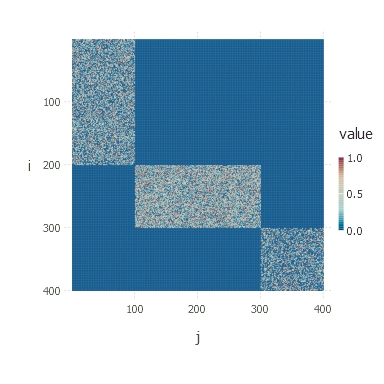

In [15]:
using Images
load("files/pB.png")

In [16]:
# The structure of singular vectors reflects the blocks
U,σ,V=svds(B,nsv=3)

(
400x3 Array{Float64,2}:
  8.29136e-18  0.0792955     6.99025e-18
  1.31693e-17  0.0658722    -1.11849e-17
  4.69035e-17  0.081133      3.04732e-17
  3.34768e-17  0.076579     -1.70465e-17
  1.83181e-17  0.0733147     8.37536e-18
  1.56926e-17  0.0688836     2.66749e-17
  6.22535e-19  0.0641004     4.96208e-18
  2.3479e-17   0.0646995     1.31158e-17
  2.49068e-18  0.0641573     2.19179e-17
  2.09773e-17  0.0651199    -1.58147e-17
  1.06686e-17  0.0515479     3.38681e-17
  9.45756e-18  0.0638338     2.95341e-17
  2.92277e-17  0.0605389     2.20414e-17
  ⋮                                     
  1.52366e-17  5.15622e-17  -0.0975962  
  4.85083e-18  5.30621e-17  -0.113212   
  8.71347e-18  3.85749e-17  -0.0846713  
  2.16953e-18  4.13244e-17  -0.092256   
 -1.05739e-17  4.03576e-17  -0.0997021  
  7.23714e-18  4.50307e-17  -0.0863748  
  8.32431e-18  6.65421e-17  -0.136735   
 -1.9644e-18   5.36267e-17  -0.105073   
 -4.01452e-18  3.56517e-17  -0.119615   
 -9.8502e-18   3.05081e-17  -0.

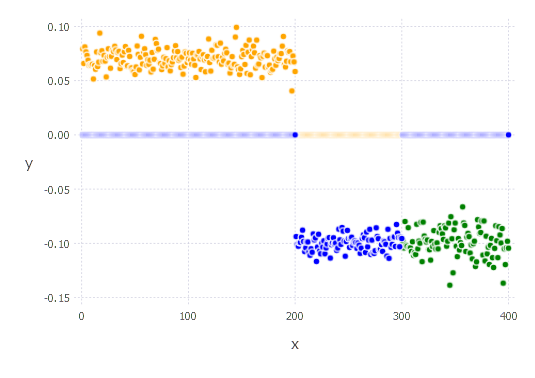

In [17]:
# Plot the first three left singular vectors
k=size(B,1)
x=collect(1:k)
Gadfly.plot(layer(x=x,y=U[:,1],Geom.point,Theme(default_color=colorant"blue")),
layer(x=x,y=U[:,2], Geom.point,Theme(default_color=colorant"orange")),
layer(x=x,y=U[:,3], Geom.point,Theme(default_color=colorant"green")))

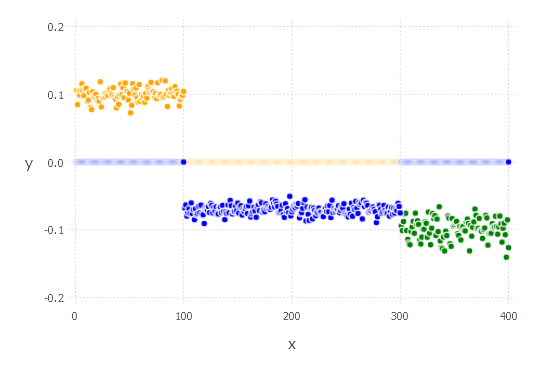

In [18]:
# Plot the first three right singular vectors
Gadfly.plot(layer(x=x,y=V[:,1],Geom.point,Theme(default_color=colorant"blue")),
layer(x=x,y=V[:,2], Geom.point,Theme(default_color=colorant"orange")),
layer(x=x,y=V[:,3], Geom.point,Theme(default_color=colorant"green")))

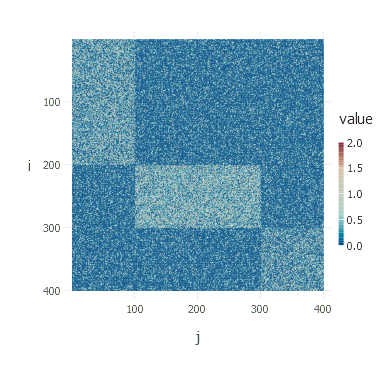

In [19]:
# Add random noise
noise=sprand(k,k,0.3)
C=B+noise
pC=spy(C)
draw(Gadfly.PNG("files/pC.png", 4inch, 4inch), pC)
load("files/pC.png")

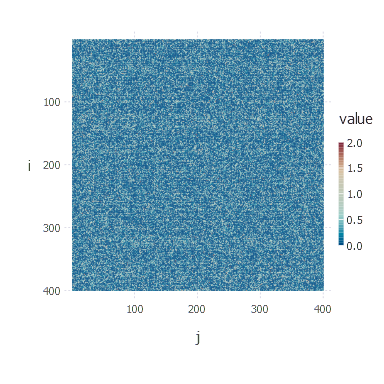

In [21]:
# Apply random permutation to rows and columns of C
D=C[randperm(k),randperm(k)]
pD=spy(D)
draw(Gadfly.PNG("files/pD.png", 4inch, 4inch), pD)
load("files/pD.png")

In [22]:
# Given D, can we recover C with spectral partitioning?
U,σ,V=svds(D,nsv=3)

(
400x3 Array{Float64,2}:
 -0.0682129  -0.0564619    0.0269153 
 -0.0475343   0.0647507    0.0390218 
 -0.0379223   0.00677681  -0.0847636 
 -0.0428189   0.0486409    0.00776102
 -0.0685166  -0.0728324    0.0198328 
 -0.0452655   0.0453347    0.0154987 
 -0.0524363   0.054101     0.0399287 
 -0.0445896   0.0601092    0.0348365 
 -0.0418268   0.0439514    0.0271277 
 -0.0442856   0.0242338   -0.0807105 
 -0.0440042   0.0497544    0.0447694 
 -0.0417075   0.0362427    0.0137202 
 -0.0402005   0.0480097    0.0203208 
  ⋮                                  
 -0.033456    0.0110894   -0.0743235 
 -0.0438591   0.0479077    0.040706  
 -0.0389642   0.0443504    0.0198764 
 -0.068321   -0.0598363    0.0225315 
 -0.0387009   0.0352592    0.00763762
 -0.043143    0.0615845    0.0326325 
 -0.0621546  -0.0711995    0.0259444 
 -0.0417652   0.0480674    0.0186676 
 -0.0449324   0.0552942    0.0277686 
 -0.0687372  -0.0690104    0.0306458 
 -0.0357806  -0.00328922  -0.0853902 
 -0.0680383  -0.0678522 

In [23]:
# Kmeans on rows and U and V
using Clustering

In [24]:
outU=kmeans(U',3)

Clustering.KmeansResult{Float64}(3x3 Array{Float64,2}:
 -0.0376635  -0.0693172  -0.0432017
  0.014476   -0.0689427   0.0489799
 -0.0883877   0.017184    0.0246946,[2,3,1,3,2,3,3,3,3,1  …  3,2,3,3,2,3,3,2,1,2],[0.00025169,0.000472758,7.24785e-5,0.000287008,2.27866e-5,0.000102112,0.000343581,0.000228644,3.30957e-5,0.000198007  …  6.26033e-5,0.000112515,0.000499457,0.000221888,0.00013314,3.9221e-5,5.23154e-5,0.000181561,0.000328132,9.59575e-5],[100,100,200],[100.0,100.0,200.0],0.09557732873189415,3,true)

In [25]:
outV=kmeans(V',3)

Clustering.KmeansResult{Float64}(3x3 Array{Float64,2}:
 -0.0371959  -0.0543116  -0.0516713
  0.0220081  -0.0427934   0.0746313
 -0.0870752   0.0114328   0.0386443,[3,2,2,1,2,1,1,1,3,2  …  3,3,1,2,1,2,3,3,1,2],[0.00017805,0.000209402,0.000522953,0.000178534,0.000318325,0.000235915,0.00119452,0.000195962,0.000143591,0.000103567  …  0.000236371,6.37694e-5,0.00189906,2.73911e-5,5.70412e-5,0.000309736,8.16264e-5,7.72645e-5,0.000556741,2.83281e-5],[100,200,100],[100.0,200.0,100.0],0.09933973650209993,2,true)

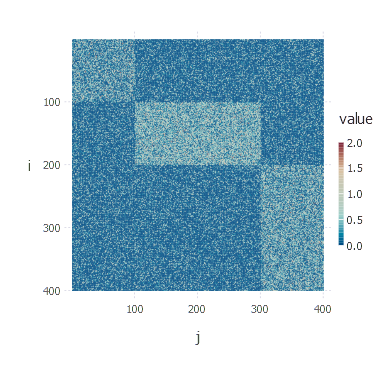

In [26]:
E=D[sortperm(outU.assignments),sortperm(outV.assignments)]
pE=spy(E)
draw(Gadfly.PNG("files/pE.png", 4inch, 4inch), pE)
load("files/pE.png")